In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from google.colab import drive
from PIL import Image

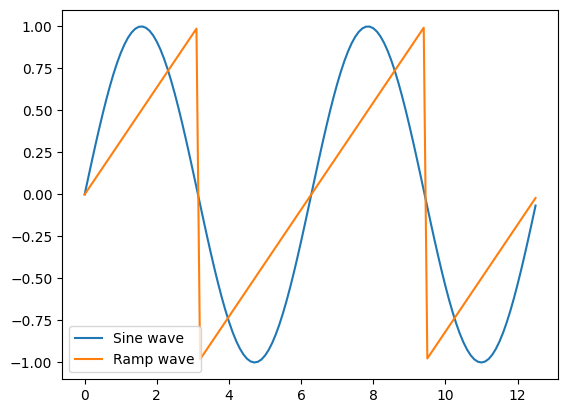

In [ ]:
# Set up time variable
t = np.arange(0, 4*np.pi, 0.1)

# Generate sine wave
sine_wave = np.sin(t)

# Generate ramp wave
def sawtooth(x):
    return (x - 2 * np.pi * np.floor((x + np.pi) / (2 * np.pi))) / np.pi

ramp_wave = sawtooth(t)

# Plot the waves
plt.plot(t, sine_wave, label='Sine wave')
plt.plot(t, ramp_wave, label='Ramp wave')
plt.legend()
plt.show()

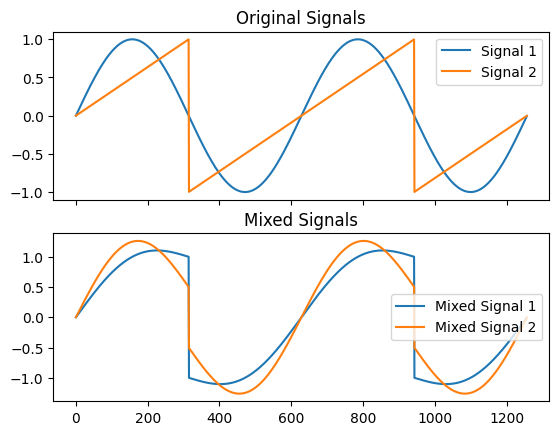

In [ ]:
matrix = np.array([[0.5,1], [1,0.5]])

t = np.arange(0, 4*np.pi, 0.01)

sign1 = np.sin(t)
sign2 = sawtooth(t)
independentssignals = [sign2, sign1]
mixed = np.array([[0.5,1], [1,0.5]])
mixed_signals = np.dot(mixed, np.stack((sign1, sign2)))
points = mixed_signals

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(sign1, label='Signal 1')
ax1.plot(sign2, label='Signal 2')
ax1.set_title('Original Signals')
ax1.legend()

ax2.plot(points [0], label='Mixed Signal 1')
ax2.plot(points [1], label='Mixed Signal 2')
ax2.set_title('Mixed Signals')
ax2.legend()

plt.show()

In [ ]:
#centering

mean = np.mean(points, axis=1).reshape(-1,1)

centered_data = points - mean

In [ ]:
#whitening

covariance = np.cov(centered_data)

eigenvalues, eigenvectors = np.linalg.eig(covariance)

D = np.diag(eigenvalues**(-0.5))

white_a = np.dot(eigenvectors,D)
white_b = np.dot(white_a,eigenvectors.T)

whitened_data = np.dot(white_b, centered_data)

In [ ]:
n_features,n_samples = whitened_data.shape
W = np.random.rand(n_features, n_features)

for i in range(n_features):
  summ = 0.0
  sum = np.array([0.0,0.0])
  for j in range(len(whitened_data)):
    a = np.tanh(W[0][i] * whitened_data[0][j] + W[1][i] * whitened_data[1][j])
    sum += a*np.array([whitened_data[0][j],whitened_data[1][j]])
    summ += 1 - a**2
  
  den = 1.0/n_samples
  wni = sum*den - np.array([W[0][i],W[1][i]])*summ*den

  wni = wni / np.linalg.norm(wni)

  if(i>0):
    for j in range(i):
      wni -= wni[0]*W[0][j] + wni[1]*W[1][j]
    wni = wni / np.linalg.norm(wni)

  W[0][i] = wni[0]
  W[1][i] = wni[1]

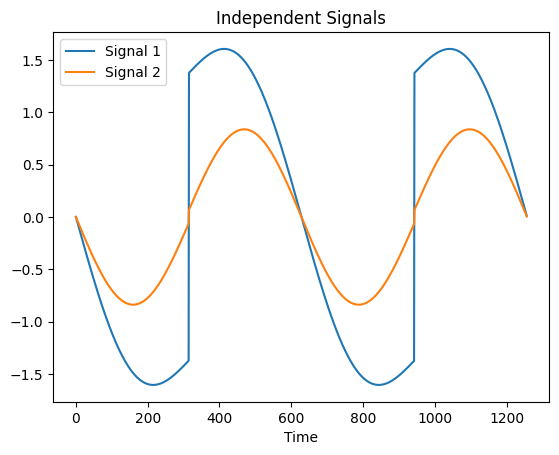

In [ ]:
final_points = np.dot(W,whitened_data)
independentsignals = final_points

plt.plot(independentsignals[0] , label='Signal 1')
plt.title('Independent Signals')
plt.plot(independentsignals[1], label='Signal 2')

plt.xlabel('Time')
plt.legend()

plt.show()